### Sales Prediction with Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# "virgülden sonra iki haneyi göster" ayarlaması
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

#### Simple Linear Regression with OLS Using Scikit-Learn

In [2]:
df = pd.read_csv("C:\\Users\\Monster\\Desktop\\Miuul\\Makine Öğrenmesi\\Kurs Materyalleri(Makine Öğrenmesi)\\datasets\\advertising.csv")

In [3]:
df

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90
...,...,...,...,...
195,38.20,3.70,13.80,7.60
196,94.20,4.90,8.10,9.70
197,177.00,9.30,6.40,12.80
198,283.60,42.00,66.20,25.50


- Veri setinde 3 tanesi bağımsız(TV,radio,newspaper) bir tanesi bağımlı(sales) olmak üzere 4 değişken vardır.
- Televizyon, radyo, gazete harcamalarına ilişkin ortaya çıkan satışların(sales column) ifade edildiği bir veri seti.
- 200 gözlem birimi ve 4 değişkenin bulunduğu küçük bir veri seti.

In [4]:
df.shape

(200, 4)

In [5]:
# veri setinden bu iki değişkeni seçiyoruz ve ikisi arasındaki doğrusal ilişkiyi modellemek istiyoruz
X = df[["TV"]]
y = df[["sales"]]

#### Model

In [6]:
reg_model = LinearRegression().fit(X,y)

In [7]:
# y_hat = b + w*x(TV), teorideki y şapka ifadesi(y_hat), denklemdeki x veri setinden seçtiğimiz TV'ye karşılık gelir
# tek değişkenli bir model kuruyorsak denklem budur


# sabit (b - bias), sklearn kütüphanesinde bias yerine intercept isimlendirmesi kullanılır
reg_model.intercept_[0]

7.032593549127694

In [8]:
# tv'nin katsayısı (w1)
reg_model.coef_[0][0]

0.04753664043301976

#### Prediction(Tahmin)

In [9]:
# 150 birimlik TV harcaması olsa ne kadar satış olması beklenir? manuel olarak hesaplayalım

reg_model.intercept_[0] + reg_model.coef_[0][0]*150

14.163089614080658

In [10]:
# 500 birimlik tv harcaması olsa ne kadar satış olur?

reg_model.intercept_[0] + reg_model.coef_[0][0]*500

30.80091376563757

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


- Veri setindeki max TV fiyatı 296, biz veri setinde olmayan bir değeri yani 500 birimi veri setine sorduk ve cevabını hesapladı.
- Veri setinde olmayan değerleri de hesaplayabiliyor(tahmin edebiliyor) demektir bu.

#### Modelin Görselleştirilmesi

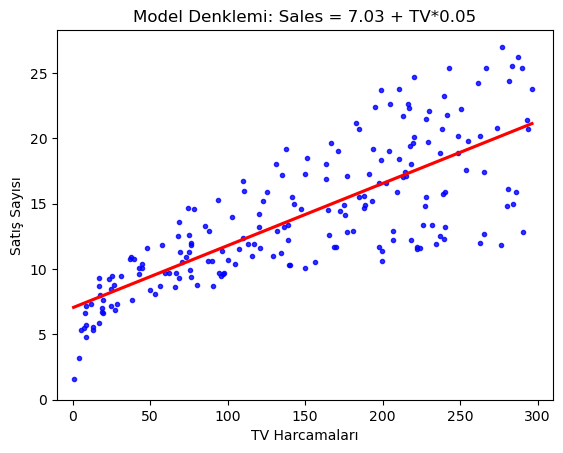

In [12]:
# x eksenine X değerlerini yani bağımsız değişkenleri, y eksenine ise y değerlerini yani bağımlı değişkenleri atarız
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

# grafik için dinamik bir isimlendirme yapılmış
g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310) # x ekseninin sınırları 
plt.ylim(bottom=0)
plt.show()

- Buradaki kırmızı çizgi modeldir(linear regression model) yani tahmin denklemidir.
- sns.regplot() fonksiyonu içindeki "ci=False" güven aralığı ekleme demektir.

#### Tahmin Başarısı

In [13]:
# MSE
y_pred = reg_model.predict(X) #X değerlerine göre modelin bütün gözlemler için y değerleri tahmini

y_pred

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431],
       [10.17476548],
       [17.23871025],
       [ 8.16396559],
       [11.66741599],
       [16.73482186],
       [16.32125309],
       [10.25557777],
       [20.40940417],
       [10.32212907],
       [14.03474068],
       [17.41459582],
       [18.31779199],
       [ 7.6600772 ],
       [17.88520856],
       [ 9.99412625],
       [19.52997632],
       [13.82557947],
       [18.44614092],
       [18.85970969],
       [10.38868036],
       [20.95607553],
       [12.39948025],
       [11.653155  ],
       [19.65832525],
       [11.58185004],
       [20.85149492],
       [19.72012288],
       [10.58358059],
       [ 9.08142275],
       [17.87094757],
       [16.65876324],
       [15.44657891],
       [20.98935118],
       [16.86792445],
       [ 8.22576322],
       [15

In [14]:
# mean_squared_error metodu bizden gerçek değerleri ve tahmin edilen değerleri ister ve ortalama hatayı verir
mean_squared_error(y, y_pred)

10.512652915656759

In [15]:
# bağımlı değişkenin yani satışların ortalaması
y.mean()

sales   14.02
dtype: float64

In [16]:
y.std()

sales   5.22
dtype: float64

- Hesaplanan MSE değeri hakkında yorum yapabilmek için satışların ortalaması ve standart sapmasına göz atmak iyi olacaktır.
- Ortalaması 14 birim standart sapması da 5 birim old. göre değerler 9 ile 19 arasında değişiyor diyebiliriz.
- Buna göre MSE değerini değerlendirecek olursak 10 birimlik hata fazla yorumunu yapabiliriz.

In [17]:
# RMSE
# MSE'den gelen ifadenin kareköküdür
np.sqrt(mean_squared_error(y, y_pred))

3.2423221486546887

In [18]:
# MAE
mean_absolute_error(y, y_pred)

2.549806038927486

In [19]:
# R-KARE
# Veri setindeki bağımsız değişkenlerin bağımlı değişkeni açıklama yüzdesidir
reg_model.score(X, y)

0.611875050850071

- Değişken sayısı arttıkça R-Kare de artmaya meyillidir bu nedenle düzeltilmiş R-Kare değerinin de göz önünde bulundurulması gerekir.

### Multiple Linear Regression(Çoklu Doğrusal Regresyon Modeli)

- Birden fazla bağımsız değişkene göre bütün veri setini modellemiş olacağız.

In [20]:
# sales değişkenini atarız ve bu dataframe'i X olarak kaydederiz, tüm bağımsız değişkenleri birlikte almak için
X = df.drop("sales", axis=1)

In [21]:
X.head()

,TV,radio,newspaper
0,230.10,37.80,69.20
1,44.50,39.30,45.10
2,17.20,45.90,69.30
3,151.50,41.30,58.50
4,180.80,10.80,58.40


In [22]:
y = df[["sales"]]

In [23]:
#### Model Kurulumu ####

# burdaki basit bir regresyon modeli olmadığından önce veri setini train ve test olarak ayırmamız gerekir
# test setinin boyutunu %20, train setinin boyutunu %80 olarak ayarlar ve rastgele bir örneklem oluşturur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [24]:
y_test.shape

(40, 1)

In [25]:
y_train.shape

(160, 1)

In [27]:
X_train.shape

(160, 3)

In [28]:
# train veri setinin bağımsız değişkenlerini ve bağımlı değişkenlerini parametre olarak verdik
reg_model = LinearRegression().fit(X_train, y_train)

In [29]:
# sabit (b - bias)
reg_model.intercept_

array([2.90794702])

In [30]:
# coefficients (w - weights)
# 3 tane bağımsız değişken old. için 3 tane weight değeri gelecektir
reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

In [31]:
##########################
# Tahmin
##########################

# Aşağıdaki gözlem değerlerine göre satışın beklenen değeri nedir?

# TV: 30
# radio: 10
# newspaper: 40

# 2.90
# w1 0.0468431 , w2 0.17854434, w3 0.00258619

# y = b + w1 * TV + w2 * radio + w3 * newspaper , model denklemi bu şekilde olmalı
# Sales = 2.90  + TV * 0.04 + radio * 0.17 + newspaper * 0.002

2.90794702 + 30 * 0.0468431 + 10 * 0.17854434 + 40 * 0.00258619

6.20213102

In [35]:
# yukarıdaki işlemi kurduğumuz modele tahmin ettirmek istersek
yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [36]:
yeni_veri

,0,1,2
0,30,10,40


In [37]:
reg_model.predict(yeni_veri)

C:\Users\Monster\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.202131]])

#### Çoklu Doğrusal Regresyonda Tahmin Başarısını Değerlendirme

In [38]:
# biz veri setini ayırırken y_train'i de oluşturmuştuk, bu X_train setine göre y_train'i tahmin etsin(y_pred) ve onun başarısını test edelim
# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

1.736902590147092

In [39]:
# TRAIN RKARE
reg_model.score(X_train, y_train)

0.8959372632325174

- Yeni değişkenler eklenince yani bağımsız değişken sayısı artınca bağımsız değişkenlerin bağımlı değişkeni açıklama yüzdesi ciddi oranda arttı.
- Yani yeni değişkenler eklendiğinde başarı artar, hata düşer.

In [40]:
# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.4113417558581578

In [41]:
# Test RKARE
reg_model.score(X_test, y_test)

0.8927605914615385

In [42]:
cross_val_score(reg_model,
                X,
                y,
                cv=10,
                scoring="neg_mean_squared_error")

array([-3.56038438, -3.29767522, -2.08943356, -2.82474283, -1.3027754 ,
       -1.74163618, -8.17338214, -2.11409746, -3.04273109, -2.45281793])

In [44]:
# skoru negatif ortalama hatayı verdiği için "-" ile çarparız(-cross_val_score)
(-cross_val_score(reg_model,
                  X,
                  y,
                  cv=10,
                  scoring="neg_mean_squared_error"))

array([3.56038438, 3.29767522, 2.08943356, 2.82474283, 1.3027754 ,
       1.74163618, 8.17338214, 2.11409746, 3.04273109, 2.45281793])

In [45]:
# Cross-validation, burada 10 katlı çapraz doğrulama yapıyoruz 
# 10 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error"))) # negative mean squared error

1.6913531708051797

- Veri setimiz küçük olduğundan 10 katlı çapraz doğrulama sonucu daha doğru sonuç vermiş olabilir.

In [46]:
# zaten küçük bir veri seti olduğundan 5 katlı CV de yeterli olabilir
# 5 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="neg_mean_squared_error")))

1.7175247278732086